# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from pathlib import Path

# Study data files
mouse_metadata_path = Path("data/Mouse_metadata.csv")
study_results_path = Path("data/Study_results.csv")

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
full_data = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID"] )

# Display the data table for preview
full_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [8]:
# Checking the number of mice.
no_of_mouse = full_data["Mouse ID"].nunique()
no_of_mouse

249

In [9]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = full_data.duplicated(subset = ["Mouse ID"], keep=False)

In [10]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice

0        True
1       False
2        True
3        True
4        True
        ...  
1888     True
1889     True
1890     True
1891     True
1892     True
Length: 1893, dtype: bool

In [11]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = full_data.drop_duplicates(subset = ["Mouse ID","Timepoint"], keep="first")
clean_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [12]:
# Checking the number of mice in the clean DataFrame.
clean_no_of_mouse = clean_data["Mouse ID"].nunique()
clean_no_of_mouse

249

## Summary Statistics

In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumor_mean = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
tumor_median = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
tumor_var = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
tumor_std = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
tumor_sem = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

tumor_mean.name = "Mean Tumor Volume"
tumor_median.name = "Median Tumor Volume"
tumor_var.name  = "Tumor Volume Variance"
tumor_std.name  = "Tumor Volume Std. Dev."
tumor_sem.name  = "Tumor Volume Std. Err."



# Assemble the resulting series into a single summary DataFrame.
tumor_summary = pd.merge(tumor_mean,tumor_median, on=["Drug Regimen"])
tumor_summary = pd.merge(tumor_summary,tumor_var, on=["Drug Regimen"])
tumor_summary = pd.merge(tumor_summary,tumor_std, on=["Drug Regimen"]) 
tumor_summary = pd.merge(tumor_summary,tumor_sem, on=["Drug Regimen"])
tumor_summary


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [14]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
tumor_summary2 = clean_data.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ['mean','median', 'var', 'std', 'sem']})
tumor_summary2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

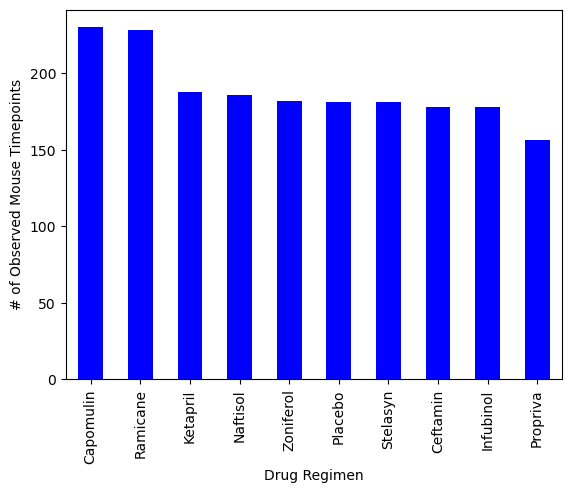

In [15]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
timepoint_by_group = clean_data.groupby("Drug Regimen")["Timepoint"].count()
timepoint_by_group = timepoint_by_group.sort_values(ascending=[False])

timepoint_by_group.plot(kind='bar', x= "Drug Regimen", y = "Timepoint", color='blue')


plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")


plt.show()

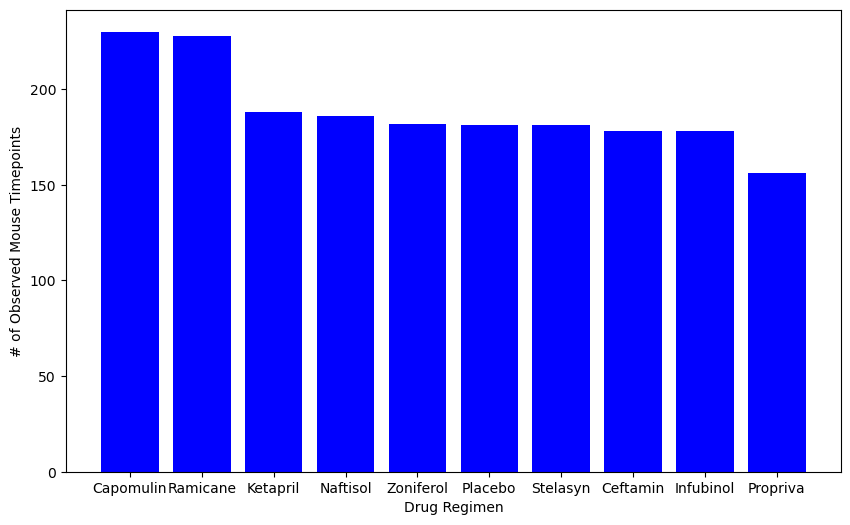

In [16]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_regimen = timepoint_by_group.index
count_timepoint = timepoint_by_group.values
plt.figure(figsize=(10,6))
plt.bar(drug_regimen, count_timepoint, color='blue')

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")


plt.show()

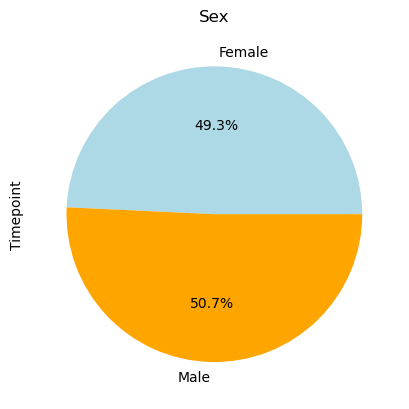

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender = clean_data.groupby("Sex")["Timepoint"].count()
gender.plot(kind='pie', colors=['lightblue', 'orange'], autopct='%1.1f%%')

plt.title("Sex")

plt.show()


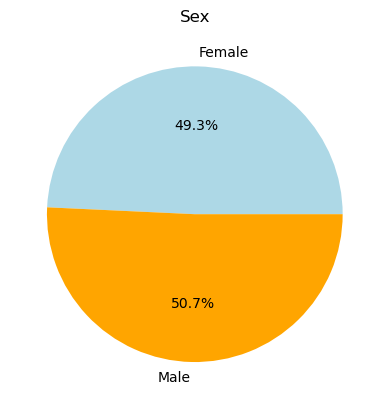

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender, labels=gender.index, colors=['lightblue', 'orange'], autopct='%1.1f%%')

plt.title("Sex")

plt.show()

## Quartiles, Outliers and Boxplots

In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
sort_list = clean_data.sort_values(by= ["Mouse ID","Timepoint"], ascending=[True, True])
last_timepoint = sort_list.groupby("Mouse ID").last()
last_timepoint



,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
a203,45,67.973419,2,Infubinol,Female,20,23
a251,45,65.525743,1,Infubinol,Female,21,25
a262,45,70.717621,4,Placebo,Female,17,29
a275,45,62.999356,3,Ceftamin,Female,20,28
a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...
z435,10,48.710661,0,Propriva,Female,12,26
z578,45,30.638696,0,Ramicane,Male,11,16
z581,45,62.754451,3,Infubinol,Female,24,25


In [20]:

# Create empty list to fill with tumor vol data (for plotting)
Capomulin_list = []
Ramicane_list = []
Infubinol_list = []
Ceftamin_list = []
# Put treatments into a list for for loop (and later for plot labels)
for index, row in last_timepoint.iterrows():
    if row["Drug Regimen"] == "Capomulin":
        Capomulin_list.append(row["Tumor Volume (mm3)"])
    elif row["Drug Regimen"] == "Ramicane":
        Ramicane_list.append(row["Tumor Volume (mm3)"])
    elif row["Drug Regimen"] == "Infubinol":
        Infubinol_list.append(row["Tumor Volume (mm3)"])
    elif row["Drug Regimen"] == "Ceftamin":
        Ceftamin_list.append(row["Tumor Volume (mm3)"])




